In [5]:
import os
from utils.auxiliary_func import *
from utils.plots_func import *
import config.const as const

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [6]:
FIGURE_SUPPLEMENTARY_DIR = const.FIGURE_SUPPLEMENTARY_DIR

DATA_PREPARATION_DIR = const.DATA_PREPARATION_DIR

In [7]:
df_file_path = os.path.join(const.FULL_TISSUE_DIR, 'core', "FLIM_features_full_tissue.csv")
full_tissue_features_df = pd.read_csv(df_file_path, dtype = {'leap_ID': str})
print(full_tissue_features_df.shape)
full_tissue_features_df.head()

(7603779, 22)


,leap_ID,nucleus_label,X coordinate,Y coordinate,lifetime_mean,area,extent,solidity,perimeter,diameter_area,...,perimeter_crofton,major_axis_length,orientation,diameter_max,eccentricity,density_radius_20,density_radius_40,density_radius_60,density_radius_80,category
0,032,1,1335.169231,2723.292308,2.720446,65.0,0.722222,0.928571,28.142136,9.097284,...,29.361935,9.406879,0.891890,10.440307,0.318169,0.008754,0.011539,0.009991,0.008555,non responder
1,032,2,1117.571429,3347.375000,2.923679,56.0,0.777778,0.949153,25.313708,8.444016,...,26.680418,8.962899,-0.572409,9.848858,0.467670,0.022282,0.019695,0.017861,0.015766,non responder
2,032,3,1234.854167,3566.583333,1.771021,48.0,0.888889,1.000000,23.071068,7.817640,...,24.554261,9.510037,1.475704,9.486833,0.741052,0.015915,0.017507,0.017330,0.016015,non responder
3,032,4,1043.071429,2489.428571,3.386071,14.0,0.700000,0.875000,11.656854,4.222008,...,13.732908,4.762643,-1.209092,5.099020,0.608034,0.010345,0.007958,0.006720,0.006565,non responder
4,032,5,670.118644,3978.237288,2.304644,59.0,0.737500,0.967213,26.142136,8.667245,...,27.465816,9.526111,-1.185587,10.440307,0.553210,0.006366,0.010743,0.010522,0.010693,non responder


In [20]:
correlation_path = os.path.join(DATA_PREPARATION_DIR, 'correlation_df_distance_and_difference_in_lifetime_nuclei_wise.csv')

df_corr = pd.read_csv(correlation_path, dtype={'leap_ID':str})

In [21]:
print(df_corr.shape)
df_corr.head()

(7603779, 9)


,leap_ID,nucleus_label,mae_radius_20,mae_radius_40,mae_radius_60,mae_radius_80,mae_radius_100,mae_radius_120,Correlation
0,015,1,0.174521,0.228092,0.190296,0.184568,0.220763,0.219502,0.468601
1,015,2,0.097728,0.263118,0.368078,0.425586,0.371470,0.416411,0.845853
2,015,3,0.098885,0.168129,0.195686,0.185029,0.192814,0.167086,0.601853
3,015,4,0.180127,0.255582,0.201160,0.210482,0.222373,0.235902,0.379591
4,015,5,0.051776,0.210250,0.245101,0.229755,0.191312,0.252795,0.668805


In [22]:
df_corr = df_corr.merge(
    full_tissue_features_df[['leap_ID', 'nucleus_label', 'density_radius_60', 'X coordinate', 'Y coordinate']],
    on=['leap_ID', 'nucleus_label'],
    how='left'
)

df_corr.head()

,leap_ID,nucleus_label,mae_radius_20,mae_radius_40,mae_radius_60,mae_radius_80,mae_radius_100,mae_radius_120,Correlation,density_radius_60,X coordinate,Y coordinate
0,015,1,0.174521,0.228092,0.190296,0.184568,0.220763,0.219502,0.468601,0.006897,3662.775510,1900.285714
1,015,2,0.097728,0.263118,0.368078,0.425586,0.371470,0.416411,0.845853,0.008311,8580.090909,3129.590909
2,015,3,0.098885,0.168129,0.195686,0.185029,0.192814,0.167086,0.601853,0.008488,4095.750000,2607.750000
3,015,4,0.180127,0.255582,0.201160,0.210482,0.222373,0.235902,0.379591,0.005394,7298.384615,4566.615385
4,015,5,0.051776,0.210250,0.245101,0.229755,0.191312,0.252795,0.668805,0.001238,7192.500000,3036.000000


In [23]:
df_corr['density_radius_60'].min(), df_corr['density_radius_60'].max()

(0.0, 0.0428834152219829)

In [87]:
row_pos1 = df_corr[(df_corr['Correlation'].between(0.98, 1)) & (df_corr['density_radius_60'].between(0.03, 0.043))].head(1)

row_neg1 = df_corr[(df_corr['Correlation'].between(-1,-0.98)) & (df_corr['density_radius_60'].between(0.025, 0.03))].head(1)

row_zero = df_corr[(df_corr['Correlation'].between(-0.0001, 0.0001)) & (df_corr['density_radius_60'].between(0.03, 0.043))].head(1)

subset = pd.concat([row_pos1, row_zero, row_neg1])

subset.head()

,leap_ID,nucleus_label,mae_radius_20,mae_radius_40,mae_radius_60,mae_radius_80,mae_radius_100,mae_radius_120,Correlation,density_radius_60,X coordinate,Y coordinate
43487,017,292,0.118348,0.135669,0.151972,0.161937,0.171149,0.191836,0.992971,0.031831,600.214286,1071.642857
2319042,067,1431,0.127728,0.093713,0.073678,0.084677,0.114274,0.113195,0.000035,0.030063,3018.450000,4749.800000
45205,017,2013,0.272975,0.253524,0.246178,0.223761,0.214768,0.184805,-0.986247,0.025111,1087.750000,1016.583333


In [66]:
leap_num='067'

In [67]:
labels  = tifffile.imread(
    os.path.join(const.SEG_AFTER_QC_DIR, f"LEAP{leap_num}_segmentation_labels_qc.tif")).astype(np.int32)

# Filter probabilities
leap_probs = full_tissue_features_df[full_tissue_features_df["leap_ID"] == leap_num].copy()

max_label = labels.max()
lookup = np.full(max_label + 1, np.nan, dtype=np.float32)

label_ids = leap_probs["nucleus_label"].astype(np.int32).values
lifetime_vals = leap_probs["lifetime_mean"].astype(np.float32).values
lookup[label_ids] = lifetime_vals
lookup = np.nan_to_num(lookup, nan=0.0)

lifetime_map = lookup[labels] 

single_nuclei_lifetime_path = os.path.join(FIGURE_SUPPLEMENTARY_DIR, f'Leap{leap_num}_single_lifetime.tif')

tifffile.imwrite(single_nuclei_lifetime_path, lifetime_map.astype(np.float32))

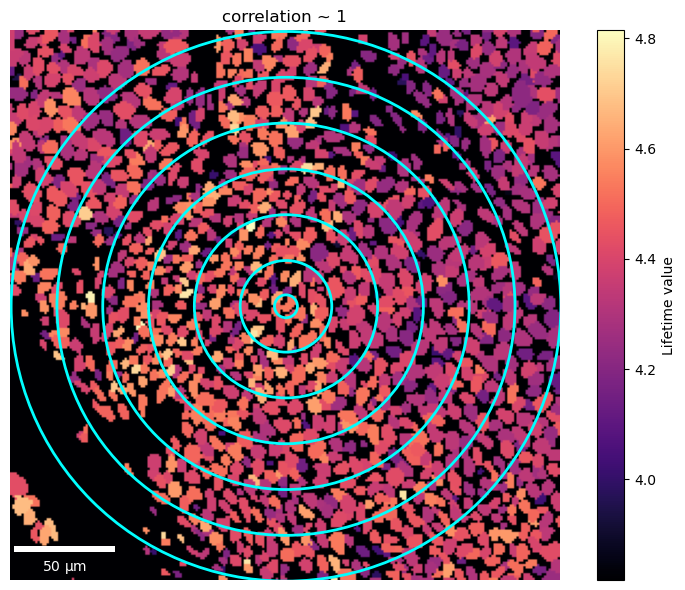

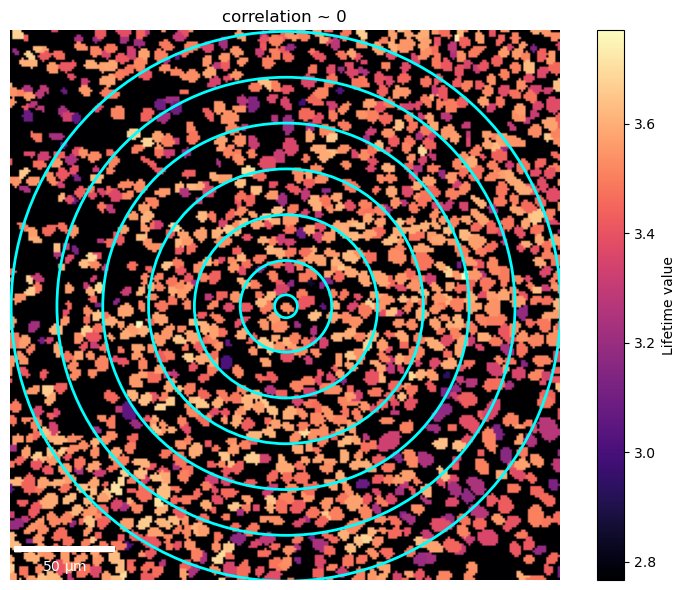

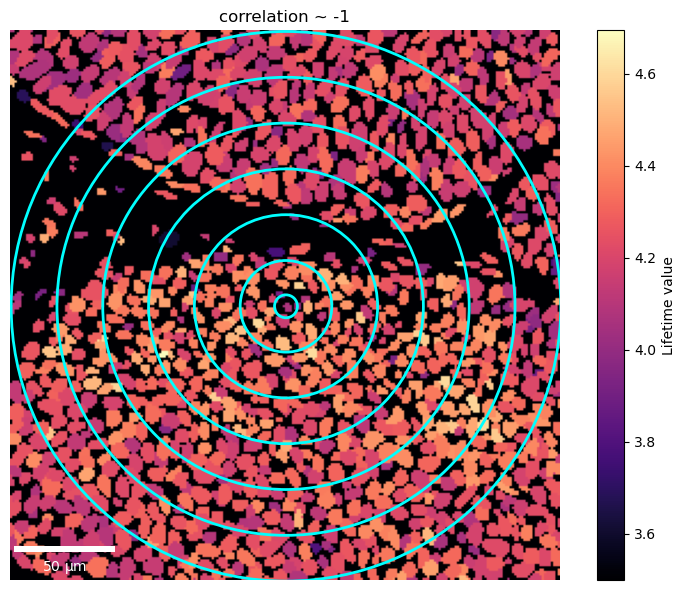

In [88]:
import os
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from matplotlib.patches import Circle
from matplotlib_scalebar.scalebar import ScaleBar


circle_radius_list = [5, 20, 40, 60, 80, 100, 120]
corr_list = [('017', 292, 'correlation ~ 1'), ('067', 1431, 'correlation ~ 0'), ('017', 2013, 'correlation ~ -1')]

for leap_num, nuclei_num, corr_type in corr_list:

    single_nuclei_lifetime_path = os.path.join(FIGURE_SUPPLEMENTARY_DIR, f'Leap{leap_num}_single_lifetime.tif')
    center = (int(subset[subset['nucleus_label']==nuclei_num]['X coordinate'].values[0]), int(subset[subset['nucleus_label']==nuclei_num]['Y coordinate'].values[0]))  # (x_center, y_center)
    zoom_size = 240
    img_path = single_nuclei_lifetime_path
    image_type = 'lifetime'
    figure_size = (10, 6)
    save_path = False

    image = img_as_float(io.imread(img_path))

    x_center, y_center = center
    half = zoom_size // 2
    cropped = image[
        y_center - half : y_center + half,
        x_center - half : x_center + half
    ]

    fig, ax = plt.subplots(figsize=figure_size)

    non_zero_pixels = cropped[cropped > 0]
    v_min = np.min(non_zero_pixels)
    v_max = np.max(non_zero_pixels)

    # v_min = np.min(cropped)
    # v_max = np.max(cropped)

    im = ax.imshow(cropped, cmap='magma', vmin=v_min, vmax=v_max)
    ax.set_title(f"{corr_type}")
    ax.axis('off')


    for circle_radius in circle_radius_list:
        circle = Circle((half, half), circle_radius, edgecolor='cyan', facecolor='none',
                        linewidth=2)
        ax.add_patch(circle)


    ax.add_artist(ScaleBar(dx=1.139, units="µm", location='lower left',
                        color='white', box_alpha=0, scale_loc='bottom'))

    cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Lifetime value")


    plt.tight_layout()
    if save_path:
        fig.savefig(save_path, bbox_inches='tight', dpi=1200, transparent=True, format='pdf')
    plt.show()
